In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/breastcancerdataset.csv")
data

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


In [ ]:
X = data.drop(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.fractal_dim_worst', 'y'], axis=1)
y = data['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.97      0.96        71
           M       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Model Accuracy: 0.9474


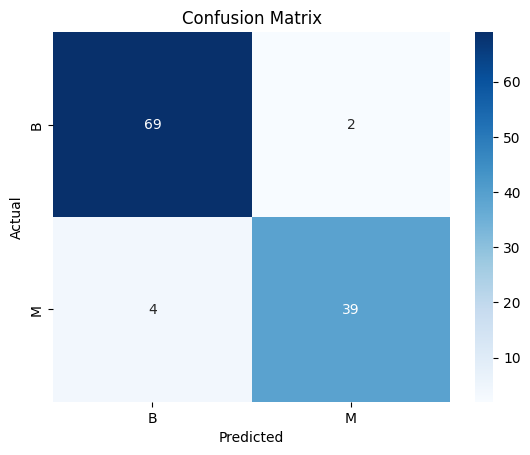

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=data['y'].unique(), yticklabels=data['y'].unique())

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

input_features = X.columns.tolist()



user_input = {}
for feature in input_features:
    value = float(input(f"Enter value for {feature}: "))
    user_input[feature] = value


import pandas as pd
input_df = pd.DataFrame([user_input])


input_scaled = scaler.transform(input_df)

prediction = model.predict(input_scaled)[0]

label = "Benign (non-cancerous)" if prediction == 0 else "Malignant (cancerous)"



print(f"\n Prediction result: The case is likely **{label}**")

Enter value for x.area_mean: 600
Enter value for x.smoothness_mean: 0.10
Enter value for x.compactness_mean: 0.13
Enter value for x.concavity_mean: 0.14
Enter value for x.concave_pts_mean: 0.06
Enter value for x.symmetry_mean: 0.18
Enter value for x.fractal_dim_mean: 0.5
Enter value for x.radius_se: 1.0
Enter value for x.texture_se: 3.0
Enter value for x.perimeter_se: 40
Enter value for x.area_se: 0.008
Enter value for x.smoothness_se: 0.03
Enter value for x.compactness_se: 0.04
Enter value for x.concavity_se: 0.015
Enter value for x.concave_pts_se: 0.02
Enter value for x.symmetry_se: 0.003
Enter value for x.fractal_dim_se: 18
Enter value for x.radius_worst: 25
Enter value for x.texture_worst: 120
Enter value for x.perimeter_worst: 1000
Enter value for x.area_worst: 0.12
Enter value for x.smoothness_worst: 0.35
Enter value for x.compactness_worst: 0.30
Enter value for x.concavity_worst: 0.12
Enter value for x.concave_pts_worst: 0.25
Enter value for x.symmetry_worst: 0.309

🩺 Prediction